In [6]:
# Import necessary libraries
%matplotlib inline
from copy import deepcopy
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt

In [7]:
# Importing the dataset
data = pd.read_csv('data_noah.csv')

In [8]:
# Change categorical data to number 0-2
data['pitch_type'] = pd.Categorical(data['pitch_type'])
data['pitch_type'] = data['pitch_type'].cat.codes

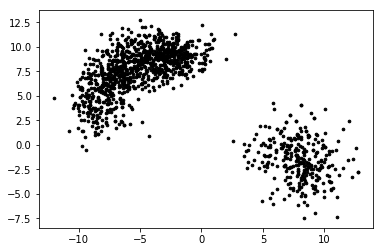

In [9]:
# Getting the values and plotting it
f1 = data['x'].values
f2 = data['y'].values
category = data['pitch_type'].values
data = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='black', s=7)

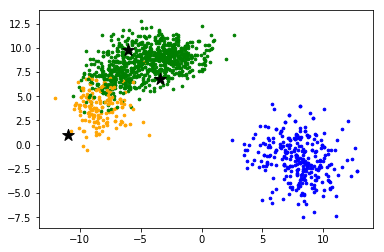

In [10]:
# Number of clusters
k = 3
# Number of training data
n = data.shape[0]
# Number of features in the data
c = data.shape[1]
# Generate random centers
mean = np.mean(data, axis = 0)
std = np.std(data, axis = 0)
centers = np.random.randn(k,c)*std + mean

# Plot the data and the centers generated as random
colors=['orange', 'blue', 'green']

for i in range(n):
    plt.scatter(data[i, 0], data[i,1], s=7, color = colors[int(category[i])])
plt.scatter(centers[:,0], centers[:,1], marker='*', c='black', s=150)

In [11]:
centers_old = np.zeros(centers.shape) # to store old centers
centers_new = deepcopy(centers) # Store new centers

clusters = np.zeros(n)
distances = np.zeros((n,k))

error = np.linalg.norm(centers_new - centers_old)
print(error)
sum = 0
# iterate till error is null
while error != 0:
    # Measure the distance to every center
    for i in range(k):
        distances[:,i] = np.linalg.norm(data - centers[i], axis=1)
        sum += distances[:,i]*distances[:,i]
#         print(distances[:,i])
    # Assign all training data to closest center
    clusters = np.argmin(distances, axis = 1)
    centers_old = deepcopy(centers_new)
    # Calculate mean for every cluster and update the center
    for i in range(k):
        centers_new[i] = np.mean(data[clusters == i], axis=0)
    error = np.linalg.norm(centers_new - centers_old)
    print(error)
print(sum)

17.60222401598214
6.389132287106184
0.0
[ 334.2737723   351.83705013  283.67596446 ... 1535.61778985  215.40768466
  387.32329102]


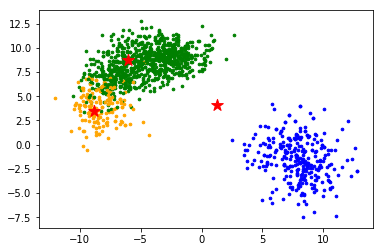

In [12]:
# Plot the data and the centers
colors=['orange', 'blue', 'green']
for i in range(n):
    plt.scatter(data[i, 0], data[i,1], s=7, color = colors[int(category[i])])
plt.scatter(centers_new[:,0], centers_new[:,1], marker='*', c='red', s=150)